In [659]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [660]:
df_labeled = pd.read_parquet('../../data/processed/ds_labeled.parquet')

In [661]:
df_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460509 entries, 0 to 460508
Data columns (total 17 columns):
 #   Column                              Non-Null Count   Dtype              
---  ------                              --------------   -----              
 0   id_prenotazione                     460509 non-null  object             
 1   id_paziente                         460509 non-null  object             
 2   data_nascita                        460509 non-null  datetime64[ns, UTC]
 3   sesso                               460509 non-null  object             
 4   regione_residenza                   460509 non-null  object             
 5   tipologia_servizio                  460509 non-null  object             
 6   descrizione_attivita                460509 non-null  object             
 7   data_contatto                       460509 non-null  object             
 8   tipologia_struttura_erogazione      460509 non-null  object             
 9   id_professionista_sanitari

In [662]:
cols_to_drop = df_labeled.columns[[0,1,2,3,5,6,7,9,11,12,14,15]]
df = df_labeled.drop(columns=cols_to_drop)

In [663]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460509 entries, 0 to 460508
Data columns (total 5 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   regione_residenza                   460509 non-null  object
 1   tipologia_struttura_erogazione      460509 non-null  object
 2   tipologia_professionista_sanitario  460509 non-null  object
 3   fascia_eta                          460509 non-null  object
 4   incremento_teleassistenze           460509 non-null  object
dtypes: object(5)
memory usage: 17.6+ MB


In [664]:
for col in df.columns:
    df[col] = df[col].factorize()[0]

In [665]:
df.to_parquet('../../data/processed/prova.parquet')
print(df)

        regione_residenza  tipologia_struttura_erogazione  \
0                       0                               0   
1                       1                               1   
2                       2                               2   
3                       3                               0   
4                       4                               2   
...                   ...                             ...   
460504                 12                               2   
460505                  7                               2   
460506                  5                               3   
460507                  3                               0   
460508                 12                               2   

        tipologia_professionista_sanitario  fascia_eta  \
0                                        0           0   
1                                        0           1   
2                                        1           0   
3                                  

In [666]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [667]:
cost = []
K = range(1, 15) # Range di valori per k (numero di cluster)

In [668]:
from sklearn.cluster import KMeans


for numero_cluster in K:
    kmeans = KMeans(n_clusters=numero_cluster, init='k-means++', n_init=20, verbose=1)
    kmeans.fit(df_normalized)
    cost.append(kmeans.inertia_) # Calcolo dell'inertia

Initialization complete
Iteration 0, inertia 3126173.7557593035.
Iteration 1, inertia 2302544.9999999767.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3816707.3378260275.
Iteration 1, inertia 2302544.9999999767.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3683843.118970509.
Iteration 1, inertia 2302544.9999999767.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 6083720.878381454.
Iteration 1, inertia 2302544.9999999767.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 6054267.399610652.
Iteration 1, inertia 2302544.9999999767.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3443658.6840735106.
Iteration 1, inertia 2302544.9999999767.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3825473.902983947.
Iteration 1, inertia 230254

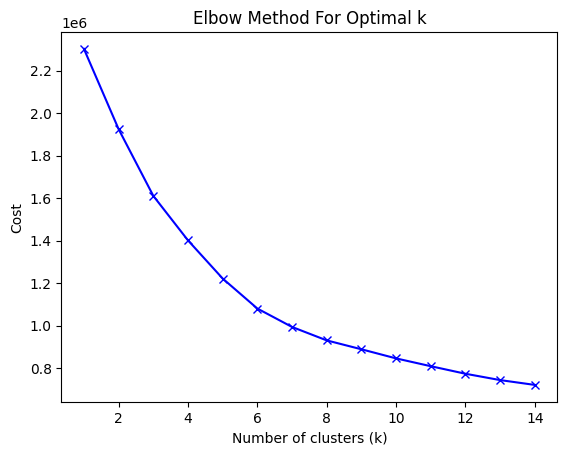

In [669]:
# Grafica il costo per ogni k
plt.plot(K, cost, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.savefig('../../data/graph/elbow_method.png')
plt.show()

In [670]:
kmeans = KMeans(n_clusters=6, init='k-means++', n_init=20, verbose=1)

In [671]:
clusters = kmeans.fit_predict(df_normalized)

Initialization complete
Iteration 0, inertia 1562860.5339608132.
Iteration 1, inertia 1288274.463122188.
Iteration 2, inertia 1251120.6423210145.
Iteration 3, inertia 1235349.7846557004.
Iteration 4, inertia 1228371.0534531865.
Iteration 5, inertia 1225989.8565665123.
Iteration 6, inertia 1225422.966680451.
Iteration 7, inertia 1225162.557696506.
Iteration 8, inertia 1224597.476480675.
Iteration 9, inertia 1224445.0049266089.
Iteration 10, inertia 1224263.417714439.
Iteration 11, inertia 1224231.6529241055.
Converged at iteration 11: center shift 2.3436810663173902e-05 within tolerance 0.00010000000000024532.
Initialization complete
Iteration 0, inertia 1661127.4330739323.
Iteration 1, inertia 1243467.8980332864.
Iteration 2, inertia 1169564.6407267323.
Iteration 3, inertia 1139889.264106763.
Iteration 4, inertia 1127912.0335714258.
Iteration 5, inertia 1122011.383514822.
Iteration 6, inertia 1120895.0951114804.
Iteration 7, inertia 1119925.030868082.
Iteration 8, inertia 1119040.05102

In [672]:
np.unique(clusters) 
df_normalized['cluster'] = clusters
df_normalized.to_parquet('../../data/processed/prova.parquet')

In [673]:
df_normalized.head()

,regione_residenza,tipologia_struttura_erogazione,tipologia_professionista_sanitario,fascia_eta,incremento_teleassistenze,cluster
0,-1.570059,-1.613087,-0.543116,-1.506991,-1.413711,4
1,-1.322904,-0.729246,-0.543116,-1.005439,-1.413711,4
2,-1.075750,0.154595,-0.162669,-1.506991,-1.413711,4
3,-0.828596,-1.613087,0.217777,-1.005439,-1.413711,4
4,-0.581441,0.154595,-0.162669,-0.503887,-1.413711,4


In [674]:
true_labels = df_normalized.incremento_teleassistenze.to_numpy()

In [675]:
true_labels

array([-1.41371107, -1.41371107, -1.41371107, ..., -0.17489672,
       -0.17489672,  1.06391763])

In [676]:
from collections import Counter

In [677]:
def calculate_purity(clusters, true_labels):
    print('Clusters:', clusters)

    N = len(true_labels) # number of data points
    purity_sum = 0

    for cluster_id in np.unique(clusters):
        # Obtain the indices of data points in the cluster
        print(cluster_id)

        cluster_indices = np.where(clusters == cluster_id)[0] # [0] to get the array from the tuple, as np.where returns a tuple
        print('Cluster indices:', cluster_indices)

        # Obtain the true labels of data points in the cluster
        cluster_labels = true_labels[cluster_indices]
        print('Cluster labels', cluster_labels)

        # Count the number of data points in each class
        most_common_label, count = Counter(cluster_labels).most_common(1)[0] # most_common returns a list of tuples, we take the first one
        print(f'Most common label: {most_common_label}, count: {count}')

        purity_sum += count
        print('\n')

    purity = purity_sum / N
    return purity


In [678]:
purity = calculate_purity(clusters, true_labels)
print('Purity is:', purity)

Clusters: [4 4 4 ... 0 5 1]
0
Cluster indices: [    13     24     36 ... 460491 460503 460506]
Cluster labels [-1.41371107 -1.41371107 -1.41371107 ... -0.17489672  1.06391763
 -0.17489672]
Most common label: -0.17489672290636532, count: 23239


1
Cluster indices: [   323    610    801 ... 460501 460505 460508]
Cluster labels [1.06391763 1.06391763 1.06391763 ... 2.30273198 1.06391763 1.06391763]
Most common label: 1.0639176271495818, count: 102210


2
Cluster indices: [    52     54     65 ... 460469 460496 460504]
Cluster labels [-1.41371107 -1.41371107 -1.41371107 ...  1.06391763 -0.17489672
  1.06391763]
Most common label: -0.17489672290636532, count: 17462


3
Cluster indices: [    27     42     45 ... 460466 460470 460484]
Cluster labels [-1.41371107 -1.41371107 -1.41371107 ... -0.17489672 -0.17489672
 -1.41371107]
Most common label: -0.17489672290636532, count: 12989


4
Cluster indices: [     0      1      2 ... 460499 460500 460502]
Cluster labels [-1.41371107 -1.41371107 -1.41